# Data Import - A first look over data

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
dataset_path = '/kaggle/input/sncb-remote-diagnostics-in-fleet-maintenance/ar41_for_ulb.csv'

# Check if the file exists before trying to read it
if os.path.exists(dataset_path):
    data = pd.read_csv(dataset_path, delimiter=';')

    # Display the basic information and the first few rows of the dataframe
    data_info = data.info()
    data_head = data.head()

    # If you want to print the information to the console
    print(data_info)
    print(data_head)
else:
    print(f"The file {dataset_path} does not exist.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17679273 entries, 0 to 17679272
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   mapped_veh_id       float64
 2   timestamps_UTC      object 
 3   lat                 float64
 4   lon                 float64
 5   RS_E_InAirTemp_PC1  float64
 6   RS_E_InAirTemp_PC2  float64
 7   RS_E_OilPress_PC1   float64
 8   RS_E_OilPress_PC2   float64
 9   RS_E_RPM_PC1        float64
 10  RS_E_RPM_PC2        float64
 11  RS_E_WatTemp_PC1    float64
 12  RS_E_WatTemp_PC2    float64
 13  RS_T_OilTemp_PC1    float64
 14  RS_T_OilTemp_PC2    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 2.0+ GB
None
   Unnamed: 0  mapped_veh_id       timestamps_UTC        lat       lon  \
0           0          181.0  2023-08-01 03:44:12  50.769818  3.872114   
1           1          143.0  2023-08-01 06:36:29  51.039993  3.693429   
2           2          183.0  2023

In [3]:
unique_train_id = data.mapped_veh_id.nunique()
print(f"number of unique_train_id: {unique_train_id}")

number of unique_train_id: 92


# Check the distribution of data

## Draw the distribution of unique_train_id

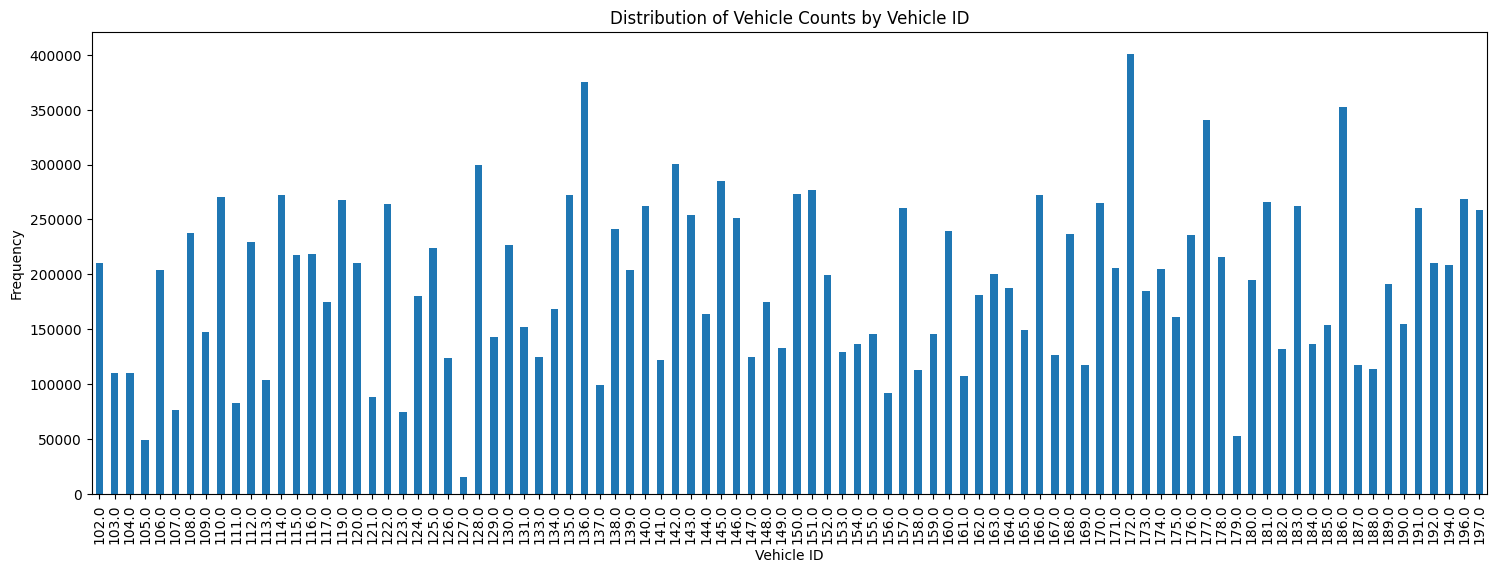

In [4]:
# First, group by 'mapped_veh_id' and count the occurrences
vehicle_counts = data.groupby('mapped_veh_id').size()

# Now, plot the bar chart
vehicle_counts.plot(kind='bar', figsize=(18, 6))

plt.title("Distribution of Vehicle Counts by Vehicle ID")
plt.xlabel("Vehicle ID")
plt.ylabel("Frequency")
plt.show()

Draw the distribution of **RS_E_InAirTemp_PC1** and **RS_E_InAirTemp_PC2** 

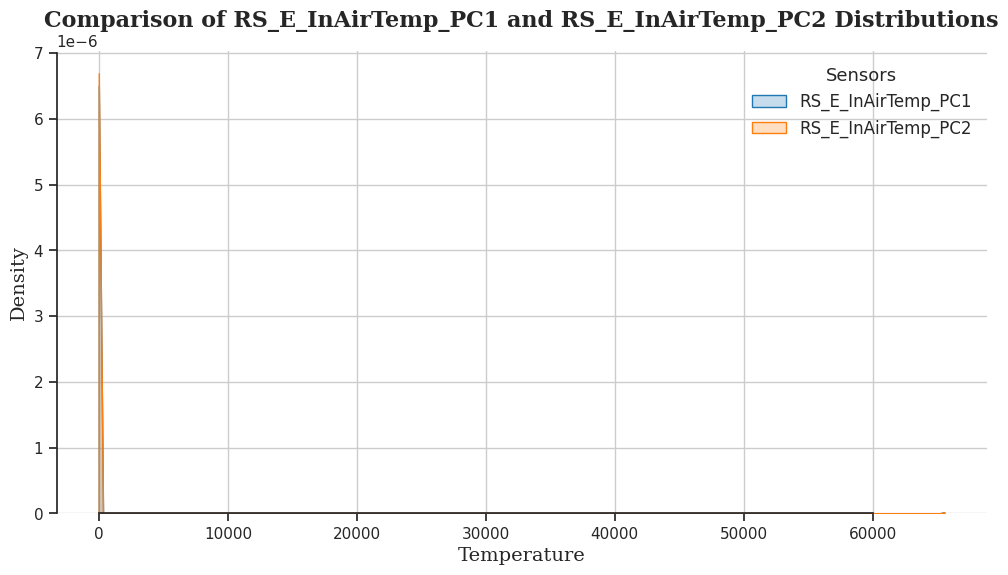

In [5]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_InAirTemp_PC1
sns.kdeplot(data['RS_E_InAirTemp_PC1'], fill=True, color="#1f77b4", label='RS_E_InAirTemp_PC1', bw_adjust=0.5)

# Plotting the KDE plot for RS_E_InAirTemp_PC2
sns.kdeplot(data['RS_E_InAirTemp_PC2'], fill=True, color="#ff7f0e", label='RS_E_InAirTemp_PC2', bw_adjust=0.5)

# Adding titles and labels with a formal font type
plt.title('Comparison of RS_E_InAirTemp_PC1 and RS_E_InAirTemp_PC2 Distributions', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Temperature', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()


it seems there exists a very huge values that make this graph hard to tell

In [6]:
# Display the basic statistics for 'RS_E_InAirTemp_PC1' and 'RS_E_InAirTemp_PC2' to identify outliers
stats_pc1 = data['RS_E_InAirTemp_PC1'].describe()
stats_pc2 = data['RS_E_InAirTemp_PC2'].describe()

(stats_pc1, stats_pc2)

(count    1.767927e+07
 mean     3.202422e+01
 std      3.280040e+02
 min      0.000000e+00
 25%      2.200000e+01
 50%      3.200000e+01
 75%      4.000000e+01
 max      6.553500e+04
 Name: RS_E_InAirTemp_PC1, dtype: float64,
 count    1.766655e+07
 mean     3.233414e+01
 std      3.479992e+02
 min      0.000000e+00
 25%      2.200000e+01
 50%      3.300000e+01
 75%      3.900000e+01
 max      6.553500e+04
 Name: RS_E_InAirTemp_PC2, dtype: float64)

In [7]:
data[data['RS_E_InAirTemp_PC1'] > 1000].sort_values('timestamps_UTC').head()

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
7046724,7046724,197.0,2023-01-28 23:09:24,50.093630,4.529261,65533.0,0.0,610.0,348.0,799.0,452.5,3.0,3.0,1.0,4.0
15011888,15011888,171.0,2023-01-28 23:09:33,50.094173,4.528174,65535.0,65534.0,638.0,610.0,801.0,802.0,3.0,5.0,1.0,6.0
11906160,11906160,171.0,2023-01-28 23:09:37,50.093919,4.528709,65535.0,65534.0,617.0,610.0,798.0,800.0,3.0,5.0,1.0,6.0
15011889,15011889,131.0,2023-01-28 23:09:43,50.093910,4.528723,65535.0,65535.0,655.0,690.0,801.0,801.0,4.0,6.0,1.0,4.0
12881469,12881469,197.0,2023-01-28 23:10:14,50.093621,4.529263,65533.0,1.0,638.0,10.0,802.0,0.0,6.0,3.0,0.0,4.0


In [8]:
data[data['RS_E_InAirTemp_PC2'] > 1000].sort_values('timestamps_UTC').head()

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
2718274,2718274,125.0,2023-01-24 00:37:18,50.936568,5.306207,45.0,65519.0,3.0,0.0,0.0,663.0,65.0,-17.0,50.0,0.0
3419052,3419052,156.0,2023-01-25 14:14:41,51.014321,3.779286,2.0,65535.0,593.0,579.0,802.0,797.0,19.0,15.0,16.0,11.0
13874968,13874968,156.0,2023-01-25 14:14:54,51.014146,3.779875,2.0,65535.0,579.0,593.0,796.0,802.0,20.0,15.0,14.0,11.0
5670468,5670468,156.0,2023-01-25 14:15:55,51.014145,3.779855,2.0,65535.0,572.0,589.0,797.0,804.0,23.0,17.0,15.0,12.0
396913,396913,156.0,2023-01-25 15:16:47,51.023516,3.758755,11.0,65535.0,434.0,472.0,879.0,872.0,52.0,48.0,52.0,47.0


the very huge temperature is not possible in the real world, and it coincidently to be the value of $2^16$ - 1, which is the maximum value for an unsigned 16-bit integer. And the other normal temperature in the near time is about 1 or 2 which is near to 0, so it is reasonable the temperature below 0 here, so we can solve this problem by make those data right 

In [9]:
# Minus 65536 to those abnormal data to make it right
data.loc[data['RS_E_InAirTemp_PC1'] > 65000, 'RS_E_InAirTemp_PC1'] -= 65536
data.loc[data['RS_E_InAirTemp_PC2'] > 65000, 'RS_E_InAirTemp_PC2'] -= 65536

print("Minus 65536 to those abnormal data to make it right")

Minus 65536 to those abnormal data to make it right


In [10]:
# From the provided screenshot, it seems the user attempted to subtract 65536 from the outlier values directly in the condition statement.
# The correction should be applied to the dataframe itself. Let's apply the correction properly.

# Correcting the abnormal values by subtracting 65536 directly in the dataframe
data.loc[data['RS_E_InAirTemp_PC1'] > 65000, 'RS_E_InAirTemp_PC1'] -= 65536
data.loc[data['RS_E_InAirTemp_PC2'] > 65000, 'RS_E_InAirTemp_PC2'] -= 65536

# Let's check if the data has been updated by looking at the maximum values now
max_value_pc1_updated = data['RS_E_InAirTemp_PC1'].max()
max_value_pc2_updated = data['RS_E_InAirTemp_PC2'].max()

max_value_pc1_updated, max_value_pc2_updated

(32771.5, 32775.0)

but there are still some temperature larger than 30000 degree, let's figure out the reason behind this:

In [11]:
data.loc[data['RS_E_InAirTemp_PC1'] > 30000]

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
1227635,1227635,196.0,2023-02-28 03:29:56,50.093810,4.528874,32767.5,7.0,453.0,299.5,799.0,797.5,36.0,61.0,35.5,60.5
2808943,2808943,162.0,2023-03-19 10:12:18,51.013141,3.781080,32759.5,23.0,0.0,3.0,0.0,0.0,29.0,22.0,58.0,20.5
4468288,4468288,151.0,2023-06-15 13:34:23,51.013158,3.780460,32759.5,28.5,0.0,3.0,0.0,0.0,-8.5,27.0,16.5,27.5
7074843,7074843,106.0,2023-03-01 03:10:02,50.094359,4.527792,32767.5,0.0,349.5,313.5,800.0,799.0,48.0,64.0,51.0,61.5
12233016,12233016,151.0,2023-06-16 13:19:44,51.013180,3.781200,32760.5,25.0,6.5,3.0,385.0,0.0,24.5,23.0,40.0,24.0
12725746,12725746,133.0,2023-01-29 09:12:21,50.401060,4.456639,32765.5,32767.0,6.5,320.5,0.0,399.5,0.0,0.0,0.0,0.0
15707416,15707416,151.0,2023-06-16 11:02:14,51.012935,3.780610,32771.5,25.0,284.5,3.0,898.5,0.0,25.0,23.0,10.0,24.0


In [12]:
data.loc[data['RS_E_InAirTemp_PC2'] > 30000]

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
2236133,2236133,161.0,2023-05-16 23:15:27,51.013925,3.780516,47.0,32759.5,138.0,3.0,0.0,0.0,76.0,30.0,73.5,65.5
8810344,8810344,183.0,2023-03-15 21:51:57,51.013422,3.780588,42.0,32760.5,6.0,6.5,0.0,401.0,38.0,0.0,38.0,45.0
12725746,12725746,133.0,2023-01-29 09:12:21,50.401060,4.456639,32765.5,32767.0,6.5,320.5,0.0,399.5,0.0,0.0,0.0,0.0
13712665,13712665,183.0,2023-03-15 21:55:28,51.013201,3.780720,41.0,32759.5,6.0,0.0,0.0,0.0,38.0,-8.5,37.0,24.0
14439216,14439216,164.0,2023-08-04 22:14:53,51.188264,5.101418,28.0,32775.0,399.5,344.5,1456.5,446.5,82.0,40.0,82.0,84.0
14657237,14657237,130.0,2023-02-08 03:46:11,51.191021,5.114999,0.0,32767.0,373.5,410.0,852.5,898.5,53.0,53.0,51.5,48.5
14964385,14964385,167.0,2023-02-08 08:25:51,51.013902,3.780504,-1.0,32767.0,622.5,291.5,792.0,400.0,5.0,1.0,3.5,2.0
17408118,17408118,156.0,2023-01-25 15:16:48,51.023798,3.758218,12.0,32768.0,494.5,527.5,1270.0,1244.5,52.0,48.0,51.0,46.0


it is interesting that the temperature is around 32765, and we find out that 65536 / 2 is 32768, so it is still becuase the minus temperature rolled over, and the reason it is around 32765 some times with a decimal 0.5, it is because it was 16 unsigned bits, but in order to save the decimal numbers, it becomes to $11111111$.$10000000$,8 bits for integers and 8 bits for decimals

so the solution for this should be: minus 0.5 of those data, multiple it with 2, minus 65536, and add 0.5 back

but data 32775.0 is an error here because the result of it is $(32775.0 - 0.5）* 2 - 65536 = 13$, so let's remove this line

In [13]:
# Remove the row with the specific erroneous value mentioned in the analysis
data = data[data['RS_E_InAirTemp_PC1'] != 32775.0]

# Apply the correction to RS_E_InAirTemp_PC1
data.loc[data['RS_E_InAirTemp_PC1'] > 32700, 'RS_E_InAirTemp_PC1'] = (data['RS_E_InAirTemp_PC1'] - 0.5) * 2 - 65536 + 0.5

# Apply the correction to RS_E_InAirTemp_PC2
data.loc[data['RS_E_InAirTemp_PC2'] > 32700, 'RS_E_InAirTemp_PC2'] = (data['RS_E_InAirTemp_PC2'] - 0.5) * 2 - 65536 + 0.5


# Let's check if the data has been updated by looking at the maximum values now
max_value_pc1_updated = data['RS_E_InAirTemp_PC1'].max()
max_value_pc2_updated = data['RS_E_InAirTemp_PC2'].max()

max_value_pc1_updated, max_value_pc2_updated

(122.0, 21839.666666666668)

and now we get a new outlier 21839.666666666668, let's figure out the reason:

In [14]:
data.loc[data['RS_E_InAirTemp_PC2'] > 20000]

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
15582979,15582979,164.0,2023-08-05 06:28:14,51.038786,5.275683,37.666667,21839.666667,386.666667,0.0,1708.333333,1158.666667,83.333333,27.333333,85.333333,86.666667


it is weired, $21839 * 3 - 65536 = -19$, we can not assure it is conincidence or by some reason, but it is totally safe to remove this outlier, so let's remove it

In [15]:
# Remove the row with the specific erroneous value mentioned in the analysis
data = data[data['RS_E_InAirTemp_PC2'] < 21838]

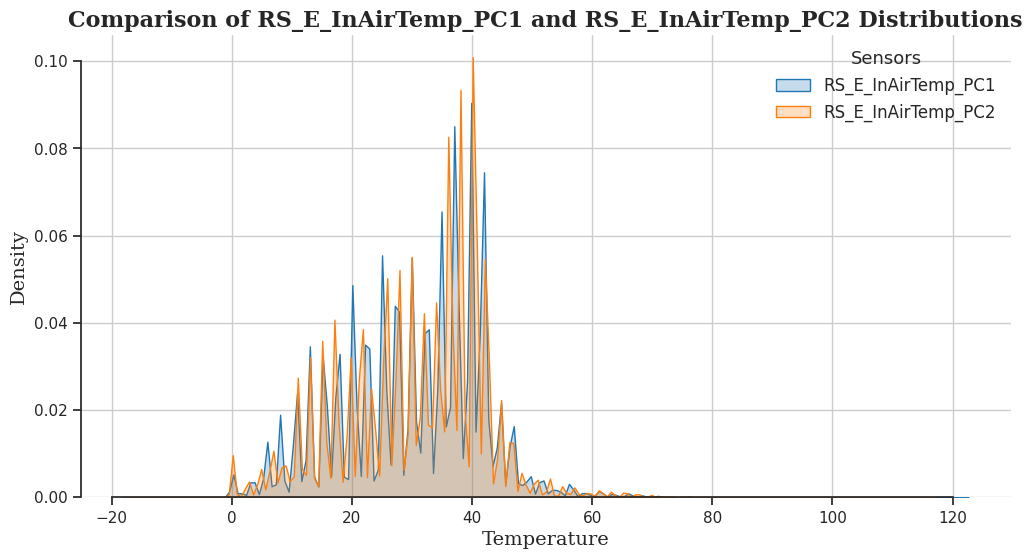

In [16]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_InAirTemp_PC1
sns.kdeplot(data['RS_E_InAirTemp_PC1'], fill=True, color="#1f77b4", label='RS_E_InAirTemp_PC1', bw_adjust=0.5)

# Plotting the KDE plot for RS_E_InAirTemp_PC2
sns.kdeplot(data['RS_E_InAirTemp_PC2'], fill=True, color="#ff7f0e", label='RS_E_InAirTemp_PC2', bw_adjust=0.5)

# Adding titles and labels with a formal font type
plt.title('Comparison of RS_E_InAirTemp_PC1 and RS_E_InAirTemp_PC2 Distributions', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Temperature', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()


the graph seems more reasonable now, but let's check more detailed where is the data larger than 100

In [17]:
data.loc[data['RS_E_InAirTemp_PC1'] > 90]

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
1445023,1445023,128.0,2023-08-18 14:05:30,50.930459,5.327558,91.0,36.0,10.0,189.0,0.0,799.0,95.0,73.0,92.0,86.0
2513840,2513840,194.0,2023-04-03 14:24:04,50.893255,3.810035,122.0,40.0,0.0,286.0,0.0,954.0,0.0,82.0,77.0,82.0
7251976,7251976,128.0,2023-08-18 14:08:29,50.930715,5.326633,91.0,36.0,10.0,369.0,0.0,1699.0,93.0,73.0,90.0,85.0
10365770,10365770,128.0,2023-08-18 14:09:23,50.932252,5.321323,91.0,37.0,10.0,186.0,0.0,829.0,93.0,76.0,90.0,86.0
10620220,10620220,128.0,2023-08-18 14:06:33,50.930469,5.327587,91.0,36.0,10.0,193.0,0.0,797.0,94.0,73.0,90.0,85.0
11377513,11377513,128.0,2023-08-18 14:08:33,50.930634,5.326947,91.0,36.0,10.0,369.0,0.0,1703.0,93.0,73.0,90.0,84.0
13076778,13076778,128.0,2023-08-18 14:07:28,50.930630,5.326952,91.0,36.0,10.0,196.0,0.0,800.0,93.0,73.0,90.0,85.0
14442521,14442521,128.0,2023-08-18 14:07:32,50.930490,5.327528,91.0,36.0,10.0,189.0,0.0,794.0,94.0,73.0,89.0,84.0
14450719,14450719,128.0,2023-08-18 14:09:28,50.932629,5.320049,91.0,37.0,10.0,179.0,0.0,778.0,93.0,76.0,90.0,86.0
16309593,16309593,128.0,2023-08-18 14:06:28,50.930632,5.326918,91.0,36.0,10.0,189.0,0.0,802.0,94.0,73.0,92.0,85.0


In [18]:
data.loc[data['RS_E_InAirTemp_PC2'] > 90]

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
324538,324538,128.0,2023-06-23 17:01:30,51.215554,4.420982,42.0,91.0,217.0,3.0,801.0,0.0,82.0,70.0,82.0,86.0
327681,327681,128.0,2023-06-23 16:39:06,51.139778,4.540462,43.0,92.0,365.5,3.0,1788.5,0.0,90.0,79.0,89.0,92.0
331147,331147,128.0,2023-06-23 16:22:02,51.180817,4.827914,42.0,93.0,196.0,3.0,800.0,0.0,87.0,85.0,85.0,97.0
331253,331253,128.0,2023-06-23 16:33:12,51.151072,4.618712,42.0,93.0,379.0,3.0,1919.0,0.0,85.0,81.0,85.0,93.0
337453,337453,128.0,2023-06-23 16:57:07,51.215085,4.420949,41.0,91.0,210.0,3.0,796.5,0.0,83.0,69.0,84.5,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16780040,16780040,128.0,2023-06-23 16:21:11,51.180556,4.827335,42.0,93.0,193.0,3.0,797.0,0.0,88.0,86.0,89.0,97.0
17179772,17179772,128.0,2023-06-23 16:48:00,51.194405,4.436466,41.0,92.0,200.0,3.0,802.0,0.0,86.0,73.0,85.0,89.0
17189307,17189307,128.0,2023-06-23 16:35:12,51.139300,4.573102,42.0,93.0,203.0,3.0,828.0,0.0,86.0,81.0,87.0,93.0
17195604,17195604,128.0,2023-06-23 16:24:05,51.177940,4.820459,42.0,94.0,196.0,3.0,809.0,0.0,88.0,84.0,90.0,96.0


it may be the correct data, there may exist some engineer problems when the temperature is unreasonablely high, so we will figure this out in the next step

Draw the distribution of **RS_E_OilPress_PC1** and **RS_E_OilPress_PC2**

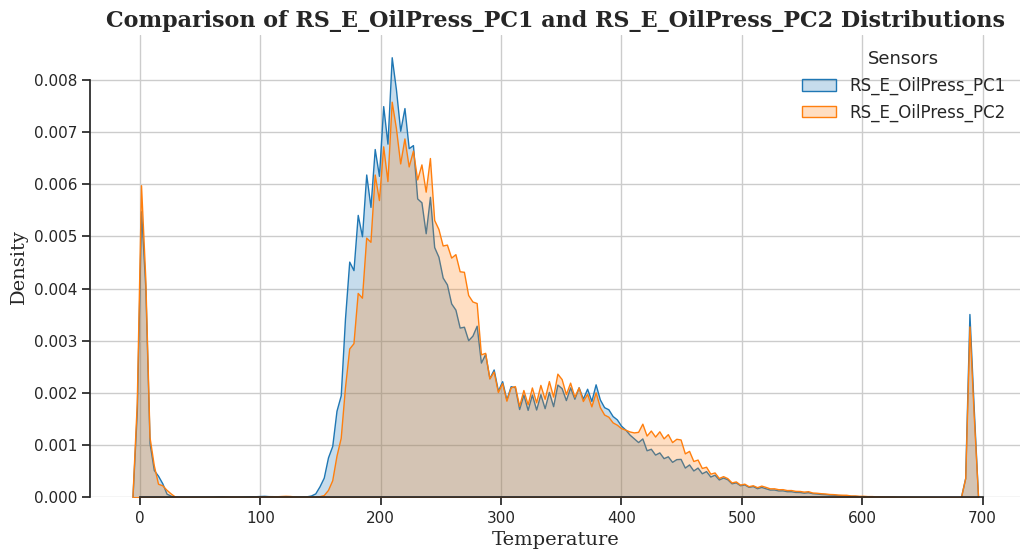

In [19]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_OilPress_PC1
sns.kdeplot(data['RS_E_OilPress_PC1'], fill=True, color="#1f77b4", label='RS_E_OilPress_PC1', bw_adjust=0.5)

# Plotting the KDE plot for RS_E_OilPress_PC2
sns.kdeplot(data['RS_E_OilPress_PC2'], fill=True, color="#ff7f0e", label='RS_E_OilPress_PC2', bw_adjust=0.5)

# Adding titles and labels with a formal font type
plt.title('Comparison of RS_E_OilPress_PC1 and RS_E_OilPress_PC2 Distributions', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Temperature', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()


Draw the distribution of **RS_E_RPM_PC1** and **RS_E_RPM_PC2**  

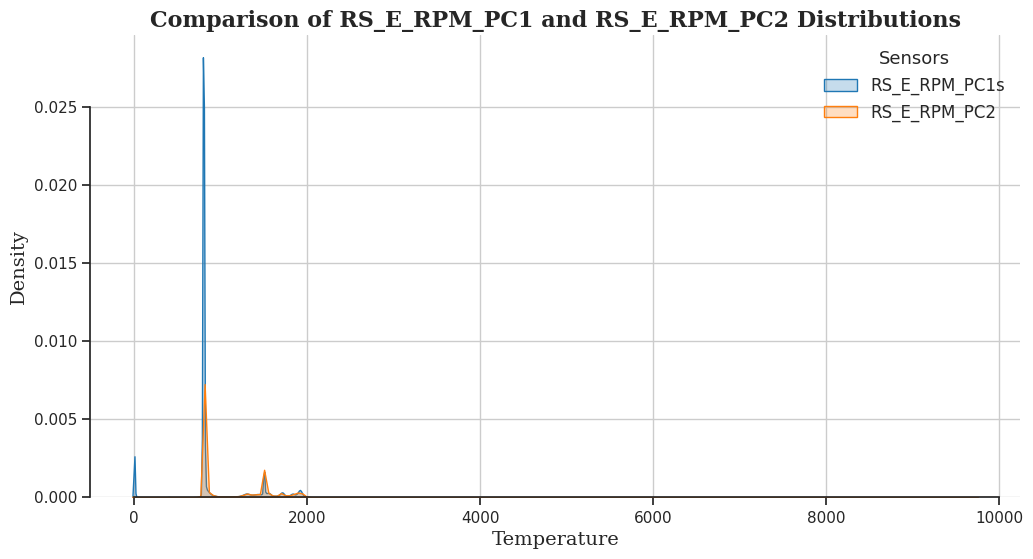

In [20]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_RPM_PC1
sns.kdeplot(data['RS_E_RPM_PC1'], fill=True, color="#1f77b4", label='RS_E_RPM_PC1s', bw_adjust=0.5)

# Plotting the KDE plot for RS_E_RPM_PC2
sns.kdeplot(data['RS_E_RPM_PC2'], fill=True, color="#ff7f0e", label='RS_E_RPM_PC2', bw_adjust=0.5)

# Adding titles and labels with a formal font type
plt.title('Comparison of RS_E_RPM_PC1 and RS_E_RPM_PC2 Distributions', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Temperature', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()


In [21]:
data[data['RS_E_RPM_PC1'] > 3000]

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2


In [22]:
data[data['RS_E_RPM_PC2'] > 3000]

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
55165,55165,164.0,2023-08-17 15:40:29,51.033765,5.329525,31.0,0.0,396.0,0.0,1389.0,9732.0,83.0,0.0,82.0,84.0
3642546,3642546,140.0,2023-02-06 10:35:17,50.393047,4.382487,12.0,20.0,17.0,189.5,0.0,6790.5,11.0,84.5,16.5,87.0


the high RPM is not continus and the data is unreasonable, so it is safe to remove those two errors data

In [23]:
data = data[data['RS_E_RPM_PC2'] < 3000]

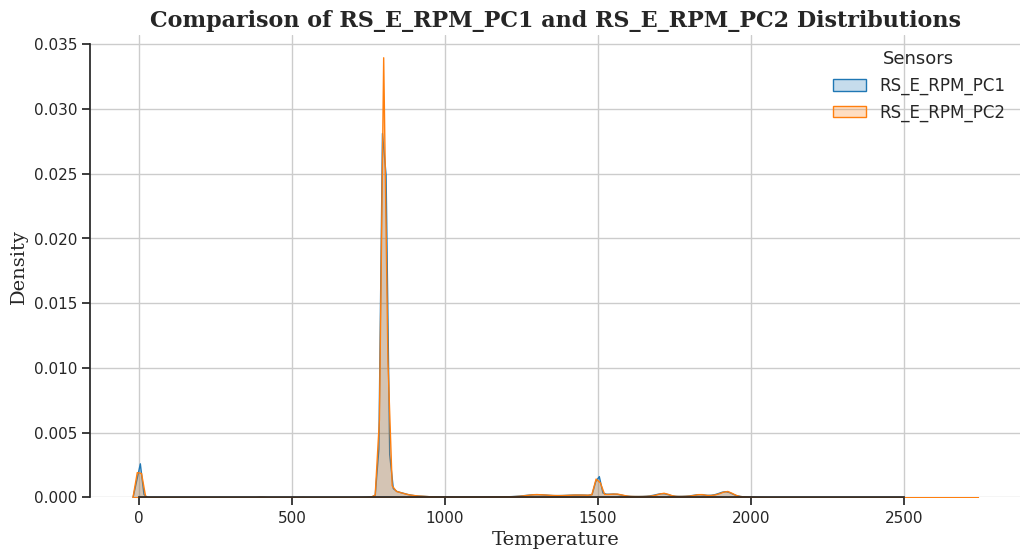

In [24]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_RPM_PC1
sns.kdeplot(data['RS_E_RPM_PC1'], fill=True, color="#1f77b4", label='RS_E_RPM_PC1', bw_adjust=0.5)

# Plotting the KDE plot for RS_E_RPM_PC2
sns.kdeplot(data['RS_E_RPM_PC2'], fill=True, color="#ff7f0e", label='RS_E_RPM_PC2', bw_adjust=0.5)

# Adding titles and labels with a formal font type
plt.title('Comparison of RS_E_RPM_PC1 and RS_E_RPM_PC2 Distributions', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Temperature', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()

the graph becomes more reasonable

Draw the distribution of **RS_E_WatTemp_PC1** and **RS_E_WatTemp_PC2** 

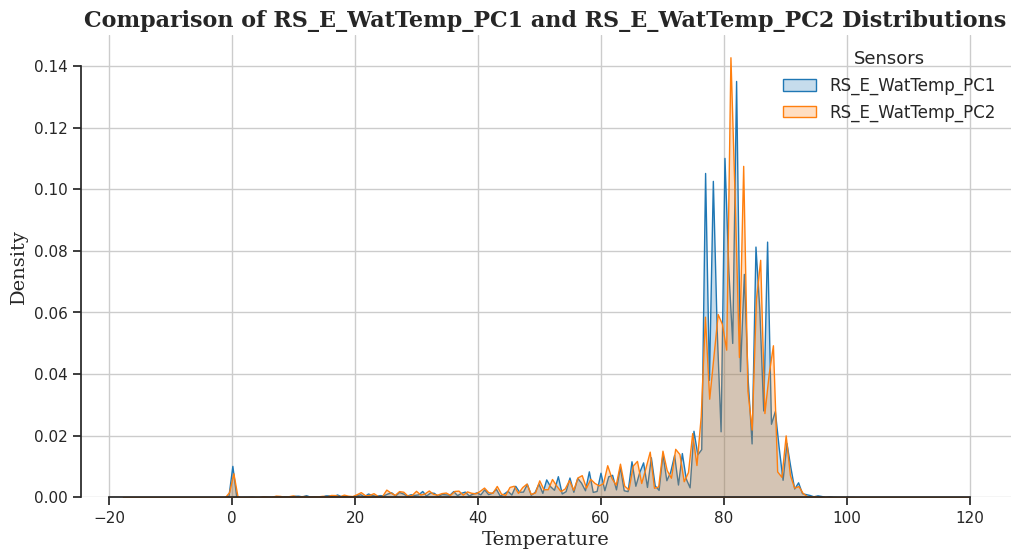

In [25]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_WatTemp_PC1
sns.kdeplot(data['RS_E_WatTemp_PC1'], fill=True, color="#1f77b4", label='RS_E_WatTemp_PC1', bw_adjust=0.5)

# Plotting the KDE plot for RS_E_WatTemp_PC2
sns.kdeplot(data['RS_E_WatTemp_PC2'], fill=True, color="#ff7f0e", label='RS_E_WatTemp_PC2', bw_adjust=0.5)

# Adding titles and labels with a formal font type
plt.title('Comparison of RS_E_WatTemp_PC1 and RS_E_WatTemp_PC2 Distributions', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Temperature', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()

Draw the distribution of **RS_T_OilTemp_PC1** and **RS_T_OilTemp_PC2**

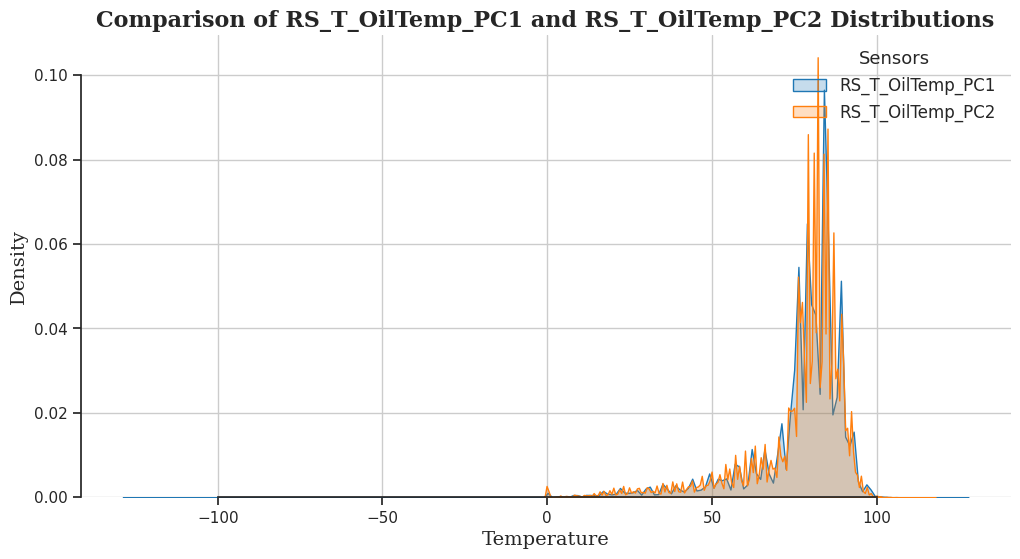

In [26]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_T_OilTemp_PC1
sns.kdeplot(data['RS_T_OilTemp_PC1'], fill=True, color="#1f77b4", label='RS_T_OilTemp_PC1', bw_adjust=0.5)

# Plotting the KDE plot for RS_T_OilTemp_PC2
sns.kdeplot(data['RS_T_OilTemp_PC2'], fill=True, color="#ff7f0e", label='RS_T_OilTemp_PC2', bw_adjust=0.5)

# Adding titles and labels with a formal font type
plt.title('Comparison of RS_T_OilTemp_PC1 and RS_T_OilTemp_PC2 Distributions', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Temperature', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()

# Remove Column `Unnamed: 0`

In [27]:
data.drop(['Unnamed: 0'], axis=1, inplace = True)
data.shape

(17666544, 14)

# Diagnose the Missing Value

In [28]:
# Convert the 'timestamps_UTC' column to datetime format and coerce errors
data['timestamps_UTC'] = pd.to_datetime(data['timestamps_UTC'], errors='coerce')

# Verify the datatype of 'timestamps_UTC' after conversion
print(data['timestamps_UTC'].dtype)

# Extract date and time attributes for visualization
data['date'] = data['timestamps_UTC'].dt.date

datetime64[ns]


In [29]:
# change pd settings to show 700 rows
pd.set_option('display.max_rows', 70)

# using the training id == 102
data_1 = data[(data['mapped_veh_id'] == 102.0)]

# get the date and time from timestamps_UTC
data_1['date'] = pd.to_datetime(data_1['timestamps_UTC']).dt.date
data_1['time'] = pd.to_datetime(data_1['timestamps_UTC']).dt.time

data_1.sort_values('time', inplace=True)

# choosing date == 2023-02-27
# result = data_1[data_1['date'] == pd.to_datetime("2023-02-27").date()]
data_1[data_1['date'] == pd.to_datetime("2023-02-27").date()]
# print(result)

/tmp/ipykernel_21/1368856383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['date'] = pd.to_datetime(data_1['timestamps_UTC']).dt.date
/tmp/ipykernel_21/1368856383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['time'] = pd.to_datetime(data_1['timestamps_UTC']).dt.time
/tmp/ipykernel_21/1368856383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,date,time
3384612,102.0,2023-02-27 00:23:40,51.012727,3.780777,22.0,12.0,0.0,552.0,0.0,800.0,20.0,26.0,19.0,19.0,2023-02-27,00:23:40
9318770,102.0,2023-02-27 00:24:40,51.012949,3.780629,22.0,11.0,0.0,565.0,0.0,799.0,20.0,28.0,17.0,19.0,2023-02-27,00:24:40
14640907,102.0,2023-02-27 00:26:42,51.013114,3.780752,22.0,11.0,0.0,538.0,0.0,798.0,20.0,35.0,20.0,20.0,2023-02-27,00:26:42
16617741,102.0,2023-02-27 00:27:42,51.013026,3.780587,22.0,11.0,0.0,517.0,0.0,798.0,20.0,37.0,17.0,21.0,2023-02-27,00:27:42
10296487,102.0,2023-02-27 00:28:41,51.013077,3.780709,22.0,10.0,0.0,507.0,0.0,800.0,19.0,40.0,17.0,22.0,2023-02-27,00:28:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855423,102.0,2023-02-27 16:12:49,51.015782,3.774001,22.0,13.0,3.0,0.0,0.0,0.0,66.0,58.0,62.0,50.0,2023-02-27,16:12:49
3399945,102.0,2023-02-27 16:13:46,51.015579,3.774632,27.0,18.0,3.0,0.0,0.0,0.0,65.0,57.0,63.0,50.0,2023-02-27,16:13:46
15951747,102.0,2023-02-27 16:13:48,51.015796,3.774018,27.0,18.0,3.0,0.0,0.0,0.0,65.0,57.0,62.0,49.0,2023-02-27,16:13:48
1949813,102.0,2023-02-27 16:14:45,51.015567,3.774603,30.0,22.0,0.0,0.0,0.0,0.0,64.0,56.0,60.0,50.0,2023-02-27,16:14:45


we can choose an iconic part of interesting data:

| mapped_veh_id | timestamps_UTC | lat       | lon      | RS_E_InAirTemp_PC1 | RS_E_InAirTemp_PC2 | RS_E_OilPress_PC1 | RS_E_OilPress_PC2 | RS_E_RPM_PC1 | RS_E_RPM_PC2 | RS_E_WatTemp_PC1 | RS_E_WatTemp_PC2 | RS_T_OilTemp_PC1 | RS_T_OilTemp_PC2 | date       | time     |
|---------------|----------------|-----------|----------|--------------------|--------------------|-------------------|-------------------|--------------|--------------|------------------|------------------|------------------|------------------|------------|---------|
| 1212149       | 102.0          | 51.014305 | 3.777572 | 5.0                | 1.0                | 486.0             | 465.0             | 798.00       | 802.00       | 40.0              | 44.0              | 28.0              | 34.00             | 2023-02-27 | 05:51:49 |
| 8948897       | 102.0          | 51.013711 | 3.779479 | 5.0                | 1.0                | 483.0             | 465.0             | 797.00       | 800.00       | 41.0              | 45.0              | 28.0              | 35.00             | 2023-02-27 | 05:52:20 |
| 8906016       | 102.0          | 51.013922 | 3.779001 | 0.0                | 1.0                | 0.0               | 131.0             | 0.00         | 0.00         | 0.0               | 45.0              | 26.0              | 34.00             | 2023-02-27 | 05:52:29 |
| 11817588      | 102.0          | 51.013670 | 3.779544 | 0.0                | 1.0                | 120.0             | 148.0             | 0.00         | 211.00       | 0.0               | 45.0              | 26.0              | 35.00             | 2023-02-27 | 05:52:30 |
| 6107927       | 102.0          | 51.013928 | 3.779015 | 0.0                | 0.0                | 0.0               | 0.0               | 0.00         | 0.00         | 0.0               | 0.0               | 24.0              | 34.00             | 2023-02-27 | 05:52:50 |
| 14922602      | 102.0          | 51.013925 | 3.779021 | 0.0                | 0.0                | 0.0               | 0.0               | 0.00         | 0.00         | 40.0              | 0.0               | 28.0              | 35.00             | 2023-02-27 | 05:52:59 |
| 8923184       | 102.0          | 51.013689 | 3.779530 | 7.0                | 3.0                | 0.0               | 0.0               | 0.00         | 0.00         | 40.0              | 0.0               | 25.0              | 34.00             | 2023-02-27 | 05:53:00 |
| 3628039       | 102.0          | 51.013924 | 3.779001 | 8.0                | NaN                | 0.0               | NaN               | 0.00         | NaN          | 40.0              | NaN               | 25.0              | NaN              | 2023-02-27 | 05:53:19 |
| 4831678       | 102.0          | 51.013933 | 3.779009 | 0.0                | NaN                | 0.0               | NaN               | 0.00         | NaN          | 0.0               | NaN               | 25.0              | NaN              | 2023-02-27 | 05:53:29 |
| 10987874      | 102.0          | 51.013939 | 3.779012 | 0.0                | NaN                | 0.0               | NaN               | 0.00         | NaN          | 0.0               | NaN               | 27.0              | NaN              | 2023-02-27 | 05:53:49 |


we can find that the 0 and NaN is also coming together, we assume that the senser should have some bugs at this time

Find a lot of missing values, and the count of them are the same, so let's try to diagnose whether it is caused by systematic problem of senser from PC2

In [30]:
# Load a subset of the data for analysis, we are focusing on one column with missing values for demonstration
subset_data = pd.read_csv(dataset_path, delimiter = ';', usecols=['timestamps_UTC', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC2'])

# Convert timestamps to datetime objects for easier analysis
subset_data['timestamps_UTC'] = pd.to_datetime(subset_data['timestamps_UTC'])

# Sort the data based on the timestamp
subset_data.sort_values('timestamps_UTC', inplace=True)

# Create a boolean series to indicate rows with missing values
missing_value_series = subset_data['RS_E_InAirTemp_PC2'].isnull()

# Print Missing Values
missing_value_series

11759521    False
14409419    False
13286611    False
17234666    False
5221806     False
            ...  
16724009    False
995273      False
14298087    False
15979243    False
10041108    False
Name: RS_E_InAirTemp_PC2, Length: 17679273, dtype: bool

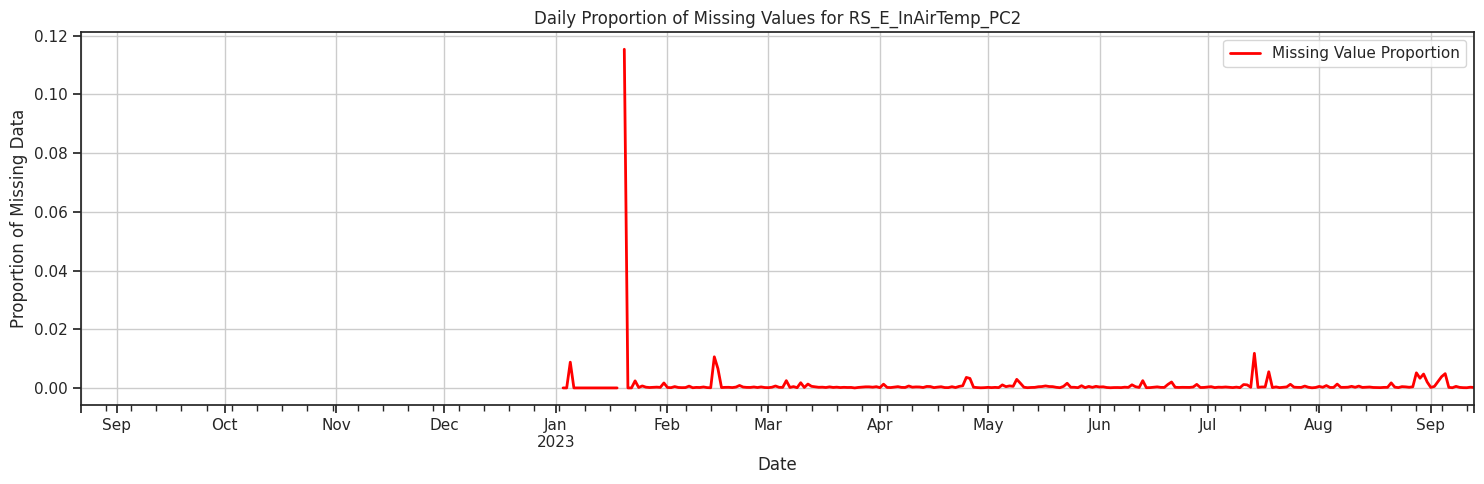

In [31]:
# Resampling the data to get daily missing data proportion
daily_missing_data = subset_data.set_index('timestamps_UTC').resample('D')['RS_E_InAirTemp_PC2'].apply(lambda x: x.isnull().mean())

# Plotting the line plot
plt.figure(figsize=(15,5))
daily_missing_data.plot(kind='line', color='red', label='Missing Value Proportion', lw=2)
plt.xlabel('Date')
plt.ylabel('Proportion of Missing Data')
plt.title('Daily Proportion of Missing Values for RS_E_InAirTemp_PC2')
plt.legend()
plt.grid(True)  # Adding grid for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

we can find that the graph starting from September, but just very few data slot, it seems be errors, we will handle this later

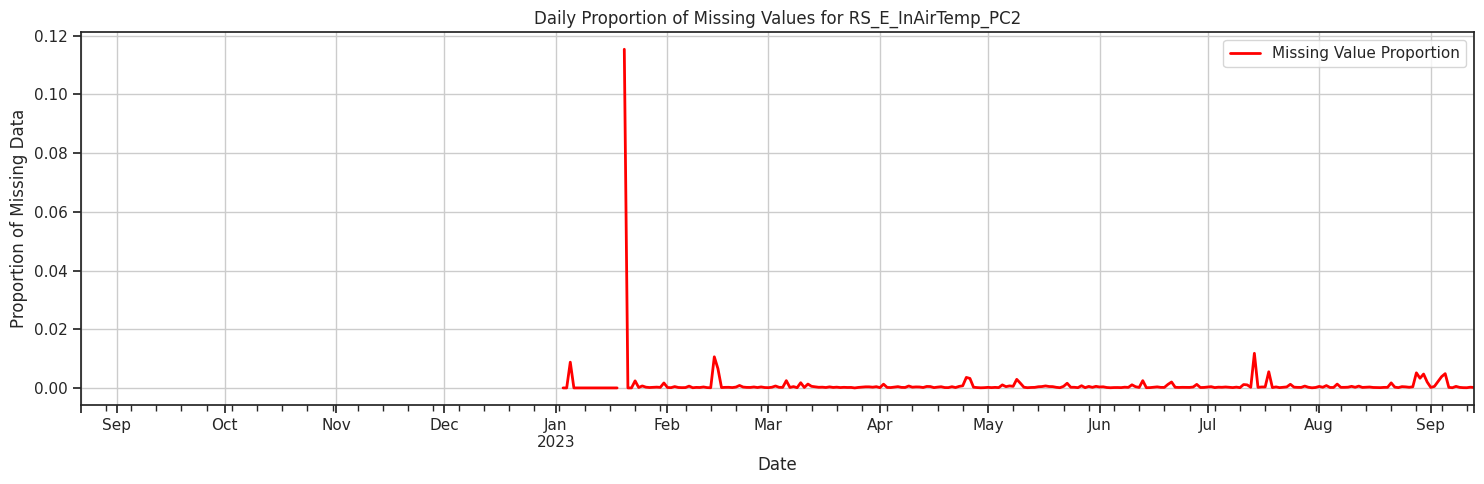

In [32]:
# Resampling the data to get daily missing data proportion
daily_missing_data = subset_data.set_index('timestamps_UTC').resample('D')['RS_E_OilPress_PC2'].apply(lambda x: x.isnull().mean())

# Plotting the line plot
plt.figure(figsize=(15,5))
daily_missing_data.plot(kind='line', color='red', label='Missing Value Proportion', lw=2)
plt.xlabel('Date')
plt.ylabel('Proportion of Missing Data')
plt.title('Daily Proportion of Missing Values for RS_E_InAirTemp_PC2')
plt.legend()
plt.grid(True)  # Adding grid for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

The two graph shows that the distribution of all missing value are the same, so let's remove the missing values

In [33]:
# Size of the dataset before removing missing values
original_size = data.shape

# Removing rows with missing values in any of the specified columns
columns_with_missing_values = [
    'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC2', 
    'RS_E_RPM_PC2', 'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC2'
]

# Drop the rows contain the missing value
data = data.dropna(subset=columns_with_missing_values)

# Size of the dataset after removing missing values
data_size = data.shape

original_size, data_size

((17666544, 15), (17666544, 15))

# Remove Duplicate Rows

In [34]:
print(data.shape)

(17666544, 15)


In [35]:
data.drop_duplicates(inplace=True)

In [36]:
print(data.shape)

(17666544, 15)


no duplicate was found, move on

# Remove Value 0 from all columns

this code not worked because it will remove the tempure higher than usual (the information we need), bue do not treat tempurature 0 as outlier

In [37]:
# # Make use of IQR Methodology
# Q1 = data['RS_E_InAirTemp_PC1'].quantile(0.25)
# Q3 = data['RS_E_InAirTemp_PC1'].quantile(0.75)

# # Calculate IQR
# IQR = Q3 - Q1

# # Define Outlier Boundary
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Define Outliers
# outliers = data[(data['RS_E_InAirTemp_PC1'] < lower_bound) | (data['RS_E_InAirTemp_PC1'] > upper_bound)]

# outliers['RS_E_InAirTemp_PC1']

In [38]:
# list of columns should not contain 0 value
columns_need_check = ['mapped_veh_id', 'timestamps_UTC', 'lat', 'lon', 'RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2']

# Remove all the rows where columns value contains 0
data = data[(data[columns_need_check] != 0).all(axis=1)]

data.shape

(16302714, 15)

# Convert the 'timestamps_UTC' column to datetime

In [39]:
# Convert the 'timestamps_UTC' column to datetime format and coerce errors
data['timestamps_UTC'] = pd.to_datetime(data['timestamps_UTC'], errors='coerce')

# Verify the datatype of 'timestamps_UTC' after conversion
print(data['timestamps_UTC'].dtype)

# Extract date and time attributes for visualization
data['date'] = data['timestamps_UTC'].dt.date
data['time'] = data['timestamps_UTC'].dt.time
data['hour'] = data['timestamps_UTC'].dt.hour
data['day'] = data['timestamps_UTC'].dt.day
data['dayofweek'] = data['timestamps_UTC'].dt.dayofweek
data['weekday'] = data['timestamps_UTC'].dt.strftime('%A')

# Verify that the new columns have been created
print(data[['date', 'time', 'hour', 'day', 'dayofweek', 'weekday']].head())

# Drop the 'timestamps_UTC' column if it's no longer needed
data.drop(['timestamps_UTC'], axis=1, inplace=True)

# Verify the shape of the data
print(data.shape)


datetime64[ns]
         date      time  hour  day  dayofweek   weekday
0  2023-08-01  03:44:12     3    1          1   Tuesday
1  2023-08-01  06:36:29     6    1          1   Tuesday
2  2023-08-24  06:53:54     6   24          3  Thursday
3  2023-08-01  13:53:38    13    1          1   Tuesday
4  2023-08-24  07:02:30     7   24          3  Thursday
(16302714, 19)


# Remove outranged Date

In [40]:
# Set the option to display up to 500 rows to shows all the results
pd.set_option('display.max_rows', 50)

date_distribution = data['date'].value_counts().sort_index()
date_distribution

date
2022-08-22       22
2023-01-01        3
2023-01-03       21
2023-01-04       47
2023-01-05      104
              ...  
2023-09-09    29354
2023-09-10    31601
2023-09-11    89159
2023-09-12    93914
2023-09-13    89804
Name: count, Length: 253, dtype: int64

In [41]:
# data['timestamps_UTC'].value_counts().sort_index()

In [42]:
# Set the option to display up to 500 rows to shows all the results
pd.set_option('display.max_rows', 50)
data[data['date'] == pd.to_datetime('2023-01-05').date()]

,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,date,time,hour,day,dayofweek,weekday
387835,114.0,51.167832,4.970915,16.0,37.0,365.0,369.0,1488.0,1504.0,81.0,81.0,77.0,81.0,2023-01-05,04:08:17,4,5,3,Thursday
387860,114.0,51.224405,4.440917,15.0,21.0,244.0,241.0,797.0,819.0,80.0,80.0,73.0,74.0,2023-01-05,09:38:28,9,5,3,Thursday
388129,114.0,51.291419,4.399841,13.0,30.0,217.0,210.0,791.0,794.0,79.0,79.0,76.0,78.0,2023-01-05,06:59:46,6,5,3,Thursday
388130,114.0,51.169224,4.990896,15.0,36.0,224.0,213.0,799.0,790.0,78.0,78.0,76.0,78.0,2023-01-05,04:06:25,4,5,3,Thursday
388131,114.0,51.190393,5.113896,13.0,21.0,231.0,227.0,795.0,802.0,80.0,80.0,74.0,75.0,2023-01-05,03:51:36,3,5,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16694651,114.0,51.190395,5.113913,13.0,20.0,244.0,244.0,801.0,802.0,77.0,78.0,70.0,71.0,2023-01-05,03:23:40,3,5,3,Thursday
17386068,114.0,51.190425,5.113904,13.0,21.0,231.0,224.0,797.0,794.0,80.0,80.0,75.0,75.0,2023-01-05,03:52:57,3,5,3,Thursday
17398823,114.0,51.190412,5.113923,13.0,20.0,244.0,238.0,802.0,798.0,78.0,78.0,70.0,71.0,2023-01-05,03:25:28,3,5,3,Thursday
17407804,114.0,51.221958,5.437313,19.0,26.0,231.0,220.0,800.0,801.0,79.0,78.0,76.0,77.0,2023-01-05,20:38:39,20,5,3,Thursday


we can find that the data is uncontinues and almost useless, so let's remove the data of date frequency less than 1000

In [43]:
# Find dates with a frequency of less than 1000
dates_to_remove = date_distribution[date_distribution < 1000].index

# Remove these dates from the DataFrame
data = data[~data['date'].isin(dates_to_remove)]

data.shape

(16300993, 19)

# Remove Outliers in lon & lat

In [44]:
# Make use of IQR Methodology
Q1 = data['lat'].quantile(0.25)
Q3 = data['lat'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define Outlier Boundary
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2 * IQR

# Define Outliers
outliers = data[(data['lat'] < lower_bound) | (data['lat'] > upper_bound)]

outliers['lat']

377873      49.383591
2929855     52.857059
14485639    49.729545
Name: lat, dtype: float64

In [45]:
# Filtering out the outliers directly without using the .drop() method
data = data[~((data['lat'] < lower_bound) | (data['lat'] > upper_bound))]
data.shape

(16300990, 19)

In [46]:
# Make use of IQR Methodology
Q1 = data['lon'].quantile(0.25)
Q3 = data['lon'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define Outlier Boundary
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define Outliers
outliers = data[(data['lon'] < lower_bound) | (data['lon'] > upper_bound)]

outliers['lon']

3213259     0.206793
4484586     0.175049
9624290     2.474403
12241898    1.954037
13246459    0.190611
16414114    2.872149
17612420    1.960787
Name: lon, dtype: float64

In [47]:
# Filtering out the outliers directly without using the .drop() method
data = data[~((data['lon'] < lower_bound) | (data['lon'] > upper_bound))]
data.shape

(16300983, 19)

# Group the data by column `mapped_veh_id`

In [48]:
data['mapped_veh_id']

0           181.0
1           143.0
2           183.0
3           177.0
4           143.0
            ...  
17679267    180.0
17679268    180.0
17679269    180.0
17679271    177.0
17679272    110.0
Name: mapped_veh_id, Length: 16300983, dtype: float64

In [49]:
data.sort_values(by=['mapped_veh_id'], inplace=True)
data

,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,date,time,hour,day,dayofweek,weekday
3697751,102.0,51.107771,3.986401,6.0,10.0,227.0,231.0,798.0,798.0,78.0,81.0,72.0,79.0,2023-01-26,07:28:19,7,26,3,Thursday
9173140,102.0,50.770013,3.871419,21.0,27.0,269.0,269.0,797.0,799.0,68.0,71.0,58.0,62.0,2023-07-28,03:00:13,3,28,4,Friday
9173161,102.0,50.877348,3.625066,45.0,44.0,317.0,339.5,1414.0,1537.0,85.0,86.0,85.0,85.5,2023-07-28,15:16:24,15,28,4,Friday
14953329,102.0,50.906726,3.920042,25.0,13.0,213.0,217.0,796.0,806.0,78.0,81.0,73.0,81.0,2023-02-09,06:25:15,6,9,3,Thursday
4882786,102.0,51.040131,3.692792,38.0,36.0,203.0,203.0,795.0,807.0,80.0,81.0,77.0,80.0,2023-06-23,12:43:33,12,23,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183488,197.0,50.095041,4.526048,20.0,12.0,217.0,365.0,796.0,794.0,78.0,52.0,76.0,52.0,2023-02-06,04:43:00,4,6,0,Monday
4394852,197.0,50.237087,4.507164,47.0,40.0,338.0,427.0,1499.0,1500.0,87.0,82.0,89.0,87.0,2023-01-30,05:58:30,5,30,0,Monday
16777054,197.0,50.303358,4.111566,38.0,40.0,193.0,255.0,798.0,804.0,86.0,77.0,82.0,79.0,2023-06-23,14:38:51,14,23,4,Friday
14850387,197.0,50.419169,4.534289,17.0,13.0,200.0,393.0,796.0,797.0,86.0,51.0,78.0,50.0,2023-03-08,02:39:58,2,8,2,Wednesday


# Save Cleaned Data as a new Dataset

In [50]:
data.to_csv('cleaned_ar41_for_ulb.csv', index=False)